In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.7


In [3]:
from lmfit import *

In [6]:
model=models.LorentzianModel()
model.param_names

['amplitude', 'center', 'sigma']

In [6]:
data=pd.read_csv('data/HIVseries.csv',header=None)
data

,0,1
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0
5,0.7448,116900.0
6,0.9817,109570.0
7,1.2563,111350.0
8,1.4926,74388.0
9,1.7299,83291.0


In [23]:
t_data=array(data[0])
V_data=array(data[1])

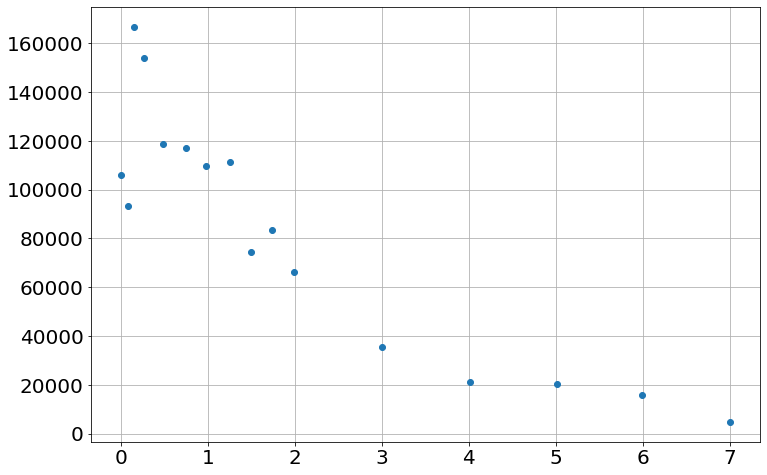

In [24]:
plot(t_data,V_data,'o')

In [25]:
def doubleexp(t,A=1,α=1,B=1,β=1):
    return A*exp(-α*t) + B*exp(-β*t)

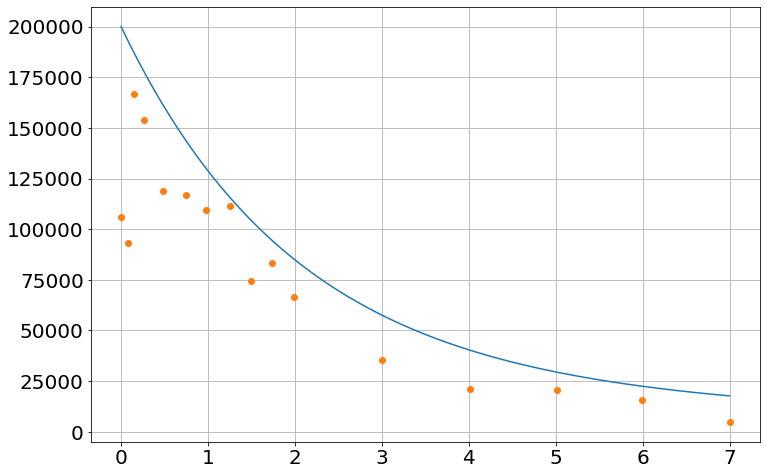

In [27]:
t_fake=linspace(0,7,100)
V_fake=doubleexp(t_fake,A=175000,α=.5,B=25000,β=.1)
plot(t_fake,V_fake,'-')
plot(t_data,V_data,'o')


In [59]:
model=Model(doubleexp)
model.param_names

['A', 'α', 'B', 'β']

In [64]:
params=model.make_params()
params['A']=Parameter("A",min=0,value=175000)
params['α']=Parameter("α",min=0,value=.1)
params['β']=Parameter("β",min=0,value=1)
params['B']=Parameter("B",min=0,value=25000)

In [65]:
result = model.fit(V_data, params, t=t_data)

In [66]:
result

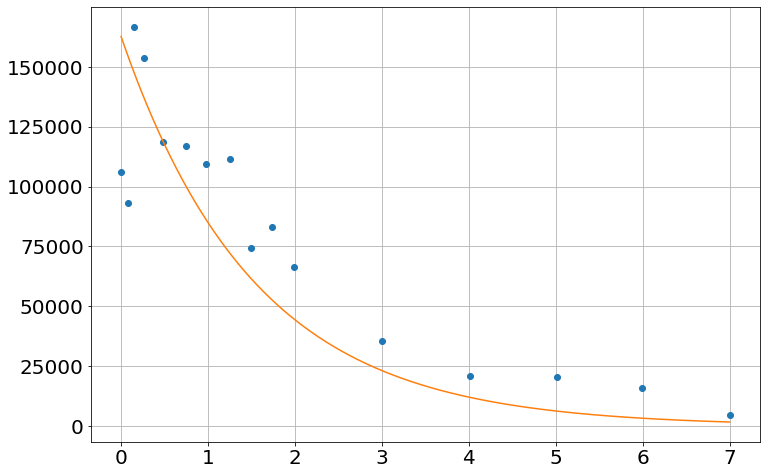

In [67]:
plot(t_data,V_data,'o')

t_fake=linspace(0,7,1000)
V_fake=result.eval(t=t_fake)
plot(t_fake,V_fake,'-')

## plotting a sign function

In [50]:
x=linspace(0,5,1000)

In [51]:
y=sin(3*x)

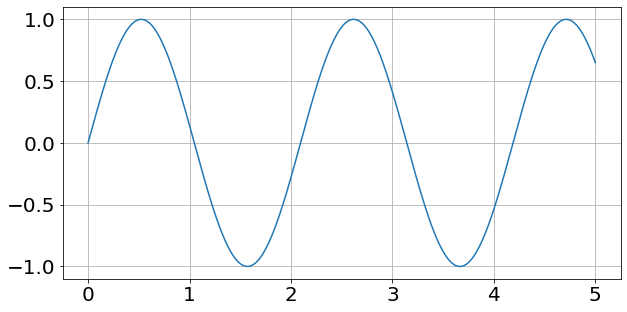

In [52]:
figure(figsize=(10,5))
plot(x,y,'-')